# Vector projections

## Import librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Create a set of 3 clusters

In [2]:
data = np.array([[2, 1.5], [1.5, 2.5], [2.75, 2], [3, 2.5], [2.25, 3], [7, 2.5], [7.5, 3.0], [8, 2.75], [8, 3.75], [7.25, 4.0], [1.5, 7], [1.75, 8.5], [3, 6.75], [2.5, 7.75], [2.75, 8.25]])
label = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

### Visualize data

(0.0, 10.0)

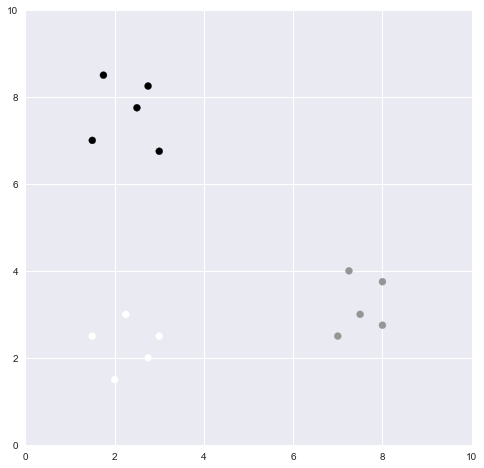

In [3]:
# make sure the figure is squared and have similar scale on each input to ensure a correct display of the vectors
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.xlim(0, 10)
plt.ylim(0, 10)

### Compute the reference as the mean of all points

In [4]:
ref = np.mean(data, axis=0)
print("reference", ref)

mean_blob0 = np.mean(data[label==0], axis=0)
mean_blob1 = np.mean(data[label==1], axis=0)
mean_blob2 = np.mean(data[label==2], axis=0)
print(mean_blob0)
print(mean_blob1)
print(mean_blob2)

reference [4.05       4.38333333]
[2.3 2.3]
[7.55 3.2 ]
[2.3  7.65]


### Plot the reference

(0.0, 10.0)

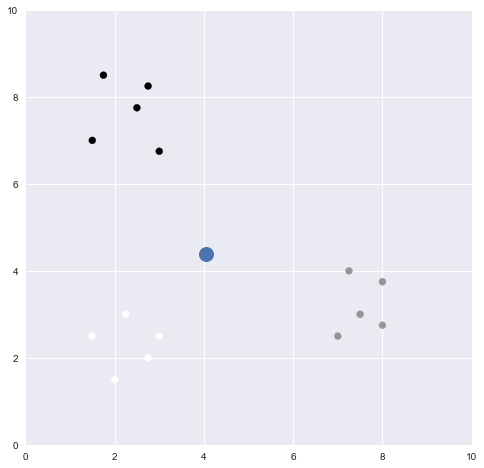

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.plot(ref[0], ref[1], marker='o', markersize=15)
plt.xlim(0, 10)
plt.ylim(0, 10)

### Compute the tuning direction from the reference

In [6]:
rel_pos = data - ref
tun1 = np.mean(rel_pos[label==0], axis=0)
tun2 = np.mean(rel_pos[label==1], axis=0)
tun3 = np.mean(rel_pos[label==2], axis=0)
tun_vectors = np.array([tun1, tun2, tun3])
print(tun1)
print(tun2)
print(tun3)


[-1.75       -2.08333333]
[ 3.5        -1.18333333]
[-1.75        3.26666667]


### print tuning vectors

(0.0, 10.0)

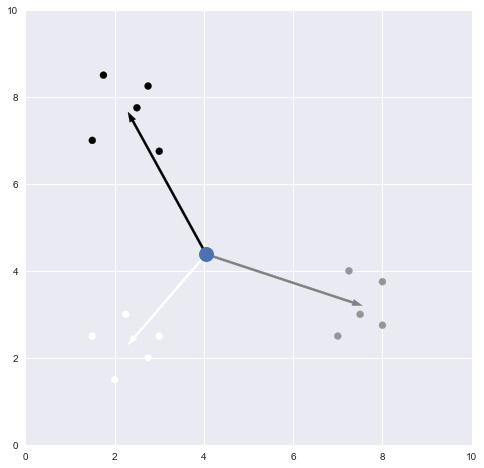

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.arrow(ref[0], ref[1], tun1[0], tun1[1], width= 0.05, color='white', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun2[0], tun2[1], width= 0.05, color='gray', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun3[0], tun3[1], width= 0.05, color='black', length_includes_head=True)
plt.plot(ref[0], ref[1], marker='o', markersize=15)
plt.xlim(0, 10)
plt.ylim(0, 10)

In [8]:
def compute_projection(pts, ref, tunings):
    # compute input relative to reference
    rel_pts = pts - ref
    
    projections = []
    for p in rel_pts:
        proj = []
        for tun in tunings:
            v = np.maximum(0, np.dot(p, tun)) / np.dot(tun, tun) * tun
            proj.append(v)
        projections.append(proj)
            
    return np.array(projections)

### compute new point by projecting it to the tuning vectors

In [28]:
new_pts = np.array([[1, 5]])

proj = compute_projection(new_pts, ref, tun_vectors)
print("relative projections")
print(proj)
length_proj = np.linalg.norm(proj, axis=2)
print(length_proj)
pred_idx = np.argmax(length_proj)
print("Category predicted:", pred_idx)
percentage_pred = length_proj / np.linalg.norm(tun_vectors, axis=1)
print("percentage_pred", percentage_pred)
print()

# compute world projections
world_proj = proj + ref
print("world proj")
print(world_proj)

relative projections
[[[-0.95806754 -1.1405566 ]
  [ 0.         -0.        ]
  [-0.93681863  1.74872811]]]
[[1.4895512  0.         1.98385462]]
Category predicted: 2
percentage_pred [[0.54746717 0.         0.53532493]]

world proj
[[[3.09193246 3.24277674]
  [4.05       4.38333333]
  [3.11318137 6.13206145]]]


### plot projections

(0.0, 10.0)

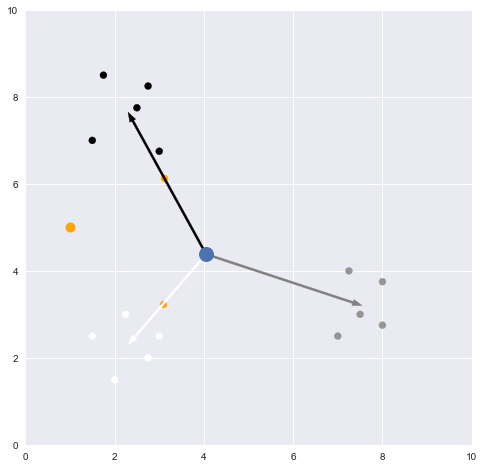

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.arrow(ref[0], ref[1], tun1[0], tun1[1], width= 0.05, color='white', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun2[0], tun2[1], width= 0.05, color='gray', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun3[0], tun3[1], width= 0.05, color='black', length_includes_head=True)
plt.plot(ref[0], ref[1], marker='o', markersize=15)
plt.plot(new_pts[0, 0], new_pts[0, 1], marker='o', markersize=10, color='orange')
plt.scatter(world_proj[0, :, 0], world_proj[0, :, 1], c='orange')
plt.xlim(0, 10)
plt.ylim(0, 10)

## visualize prediction space

In [11]:
def predict_ref_based(data, ref, tun):
    # compute projections
    proj = compute_projection(data, ref, tun)

    # compute vector length
    length = np.linalg.norm(proj, axis=2)
    
    # giet index having the max length
    pred = np.argmax(length, axis=1)
    
    return pred

In [12]:
# create 2d points over the space
xv, yv = np.meshgrid(np.linspace(0, 10, 11), np.linspace(0, 10, 11))
xv_flat = np.expand_dims(np.reshape(xv, -1), axis=1)
yv_flat = np.expand_dims(np.reshape(yv, -1), axis=1)
points_data = np.concatenate((xv_flat, yv_flat), axis=1)
print("shape points_data", np.shape(points_data))

# predict all points
y_pred = predict_ref_based(points_data, ref, tun_vectors)

shape points_data (121, 2)


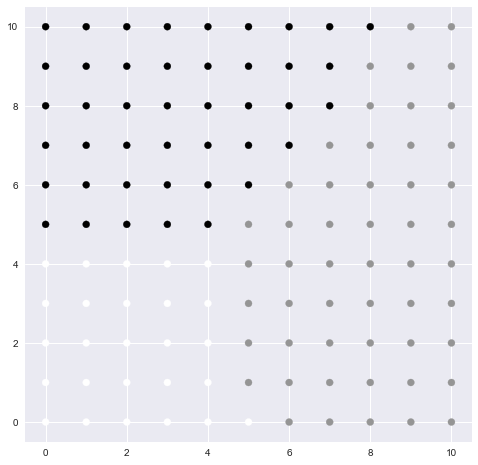

In [13]:
# plot all points
plt.figure(figsize=(8, 8))
plt.scatter(xv_flat, yv_flat, c=y_pred)

## computing vector boundaries

In [14]:
boundary1 = tun1 / np.linalg.norm(tun1) + tun2 / np.linalg.norm(tun2)
boundary2 = tun2 / np.linalg.norm(tun2) + tun3 / np.linalg.norm(tun3)
boundary3 = tun3 / np.linalg.norm(tun3) + tun1 / np.linalg.norm(tun1)
print("boundary")
print(boundary1)
print(boundary2)
print(boundary3)
b1_world = boundary1 + ref
b2_world = boundary2 + ref
b3_world = boundary3 + ref

print("boundary world")
print(b1_world)
print(b2_world)
print(b3_world)

boundary
[ 0.30412921 -1.08598968]
[0.47509988 0.56119515]
[-1.1154135   0.11577511]
boundary world
[4.35412921 3.29734365]
[4.52509988 4.94452848]
[2.9345865  4.49910844]


### plot boundaries vectors

(0.0, 10.0)

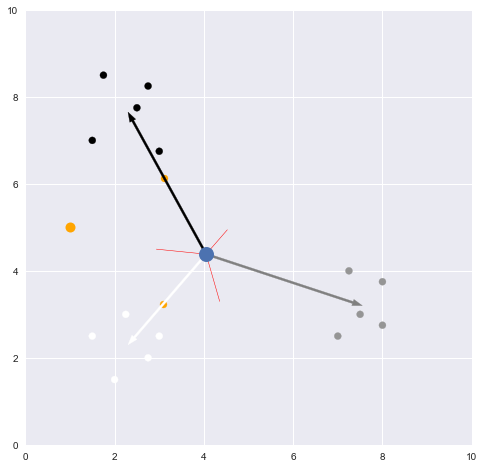

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.arrow(ref[0], ref[1], tun1[0], tun1[1], width= 0.05, color='white', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun2[0], tun2[1], width= 0.05, color='gray', length_includes_head=True)
plt.arrow(ref[0], ref[1], tun3[0], tun3[1], width= 0.05, color='black', length_includes_head=True)
plt.plot([ref[0], b1_world[0]], [ref[1], b1_world[1]], linewidth=0.5, color='red')
plt.plot([ref[0], b2_world[0]], [ref[1], b2_world[1]], linewidth=0.5, color='red')
plt.plot([ref[0], b3_world[0]], [ref[1], b3_world[1]], linewidth=0.5, color='red')
plt.plot(ref[0], ref[1], marker='o', markersize=15)
plt.plot(new_pts[0, 0], new_pts[0, 1], marker='o', markersize=10, color='orange')
plt.scatter(world_proj[0, :, 0], world_proj[0, :, 1], c='orange')
plt.xlim(0, 10)
plt.ylim(0, 10)

## Creating a multi-class linear classifier

Since we have only 12 points, the stochastic gradient descent is computed directly over the 12 points


In [16]:
n_classes = 3
# transform label to one-hot-encoding
y = np.eye(n_classes)[label]

np.random.seed(0)
w = np.random.rand(2, n_classes)
bias = np.random.rand(1, n_classes)

n_iter = 100000
lr = 0.01

for n in range(n_iter):
    # compute forward prediction
    output = np.dot(data, w) + bias
    y_pred = np.maximum(0, output)

    # compute mse error
    error = np.mean(np.power(y_pred - y, 2))
    #print("error", error)

    # compute gradient
    err_prime = 2 * (y_pred - y) / len(y)

    # backward propagation
    weights_error = np.dot(data.T, err_prime)

    # update parameters
    w -= lr * weights_error
    bias -= lr * np.sum(err_prime, axis=0)
    
# compute forward prediction
output = np.dot(data, w) + bias
y_pred = np.maximum(0, output)
print("y_pred")
print(y_pred)

y_pred
[[1.20927113 0.         0.        ]
 [1.07547108 0.         0.0073174 ]
 [0.95926023 0.         0.        ]
 [0.80080476 0.03677023 0.        ]
 [0.82546018 0.         0.06982447]
 [0.06836125 0.88319265 0.        ]
 [0.         0.98404561 0.        ]
 [0.         1.09232333 0.        ]
 [0.         1.08242365 0.        ]
 [0.         0.92124453 0.02927667]
 [0.06137137 0.         0.88917901]
 [0.         0.         1.17130703]
 [0.         0.         0.76923158]
 [0.         0.         0.98885254]
 [0.         0.         1.07501131]]


In [17]:
print("weight", np.shape(w))
print(w)
print("bias", np.shape(bias))
print(bias)

weight (2, 3)
[[-0.18311088  0.2116056  -0.04730341]
 [-0.22535549 -0.00989968  0.19596925]]
bias (1, 3)
[[ 1.91352613 -0.57329739 -0.4116506 ]]


### predict orange point

In [18]:
output = np.dot(new_pts, w) + bias
print("shape output", np.shape(output))
print(output)
y_pred = np.argmax(output, axis=1)
print(y_pred)

shape output (1, 3)
[[ 0.60363779 -0.41119017  0.52089222]]
[0]


### Plot the decision boundaries


compute the 3 linear lines as y = ax + b

In [19]:
a = []
b = []
for i in range(3):
    a_ = -w[0, i] / w[1, i]
    b_ = -bias[0, i] / w[1, i]
    print("y = {}x + {}".format(a_, b_))
    a.append(a_)
    b.append(b_)

y = -0.8125423400754795x + 8.49114487564132
y = 21.374999994926092x + -57.910714271100126
y = 0.2413817972018113x + 2.1005877686425842


(0.0, 10.0)

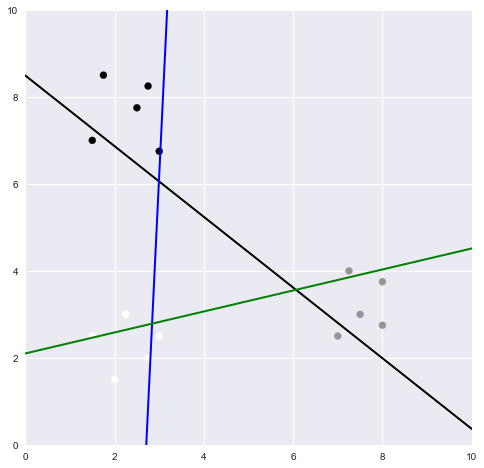

In [20]:
# 200
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.plot([0, 10], [b[0], 10*a[0] + b[0]], 'k-', lw=2)
plt.plot([0, 10], [b[1], 10*a[1] + b[1]], 'b-', lw=2)
plt.plot([0, 10], [b[2], 10*a[2] + b[2]], 'g-', lw=2)
plt.xlim(0, 10)
plt.ylim(0, 10)

In [21]:
# predict all points 
output = np.dot(points_data, w) + bias
print("shape output", np.shape(output))
y_pred = np.argmax(output, axis=1)

shape output (121, 3)


(0.0, 10.0)

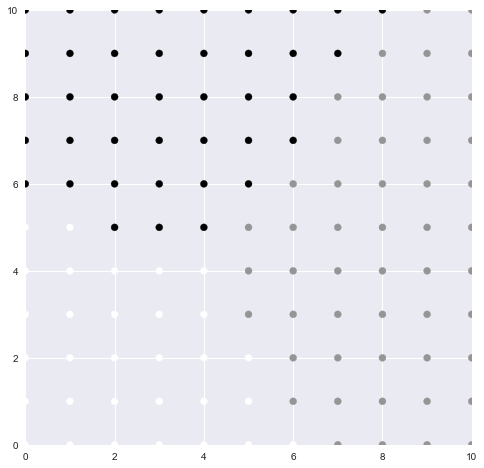

In [22]:
# plot all points
plt.figure(figsize=(8, 8))
plt.scatter(xv_flat, yv_flat, c=y_pred)
plt.xlim(0, 10)
plt.ylim(0, 10)

### compute fitted ref and boundaries

starting with:  
(1) $w_{11}x + w_{12}y + B_1 = 0$  
(2) $w_{21}x + w_{22}y + B_2 = 0$  
(3) $w_{31}x + w_{32}y + B_3 = 0$

In [23]:
# compute fitted middle point
x1 = np.linalg.solve([[w[0, 0], w[1, 0]], [w[0, 1], w[1, 1]]], [-bias[0, 0], -bias[0, 1]])
x2 = np.linalg.solve([[w[0, 1], w[1, 1]], [w[0, 2], w[1, 2]]], [-bias[0, 1], -bias[0, 2]])
x3 = np.linalg.solve([[w[0, 2], w[1, 2]], [w[0, 0], w[1, 0]]], [-bias[0, 2], -bias[0, 0]])
print("x1, x2, x3")
print(x1)
print(x2)
print(x3)
fit_ref = np.mean(np.array([x1, x2, x3]), axis=0)
print("fitteed middle point (fit_ref):")
print(fit_ref)
print("mean point")
print(ref)

x1, x2, x3
[2.99275414 6.05940542]
[2.83961324 2.78601872]
[6.06358359 3.56422647]
fitteed middle point (fit_ref):
[3.96531699 4.1365502 ]
mean point
[4.05       4.38333333]


In [24]:
# unit vectors
u1 = [1, a[0]] / np.linalg.norm([1, a[0]])
u2 = [1, a[1]] / np.linalg.norm([1, a[1]])
u3 = [1, a[2]] / np.linalg.norm([1, a[2]])
print(u1)
print(u2)
print(u3)
# compute boundaries
fit_boundary1 = 10 * (u1 + u2) + fit_ref
fit_boundary2 = 10 * (u2 + u3) + fit_ref
fit_boundary3 = 10 * (u3 + u1) + fit_ref

[ 0.77609792 -0.63061242]
[0.04673251 0.99890744]
[0.97208166 0.23464282]


(0.0, 10.0)

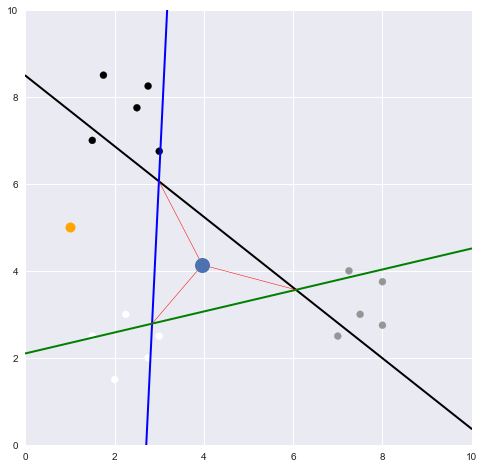

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.plot([0, 10], [b[0], 10*a[0] + b[0]], 'k-', lw=2)
plt.plot([0, 10], [b[1], 10*a[1] + b[1]], 'b-', lw=2)
plt.plot([0, 10], [b[2], 10*a[2] + b[2]], 'g-', lw=2)
plt.plot([fit_ref[0], x1[0]], [fit_ref[1], x1[1]], linewidth=0.5, color='red')
plt.plot([fit_ref[0], x2[0]], [fit_ref[1], x2[1]], linewidth=0.5, color='red')
plt.plot([fit_ref[0], x3[0]], [fit_ref[1], x3[1]], linewidth=0.5, color='red')
plt.plot(fit_ref[0], fit_ref[1], marker='o', markersize=15)
plt.plot(new_pts[0, 0], new_pts[0, 1], marker='o', markersize=10, color='orange')
plt.xlim(0, 10)
plt.ylim(0, 10)